In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df = pd.read_csv("C://Users//YASH//Desktop//DataScienceML//Datasets//Algerian_forest_fires_cleaned_dataset.csv")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [37]:
df.duplicated().sum()

0

In [38]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [39]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [40]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [41]:
df["Classes"] = df["Classes"].str.strip()

In [42]:
df["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [43]:
df["isFire"] = df["Classes"].apply(lambda x: 1 if x == "fire" else 0)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
 15  isFire       243 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 30.5+ KB


In [45]:
df["isFire"].value_counts()

isFire
1    137
0    106
Name: count, dtype: int64

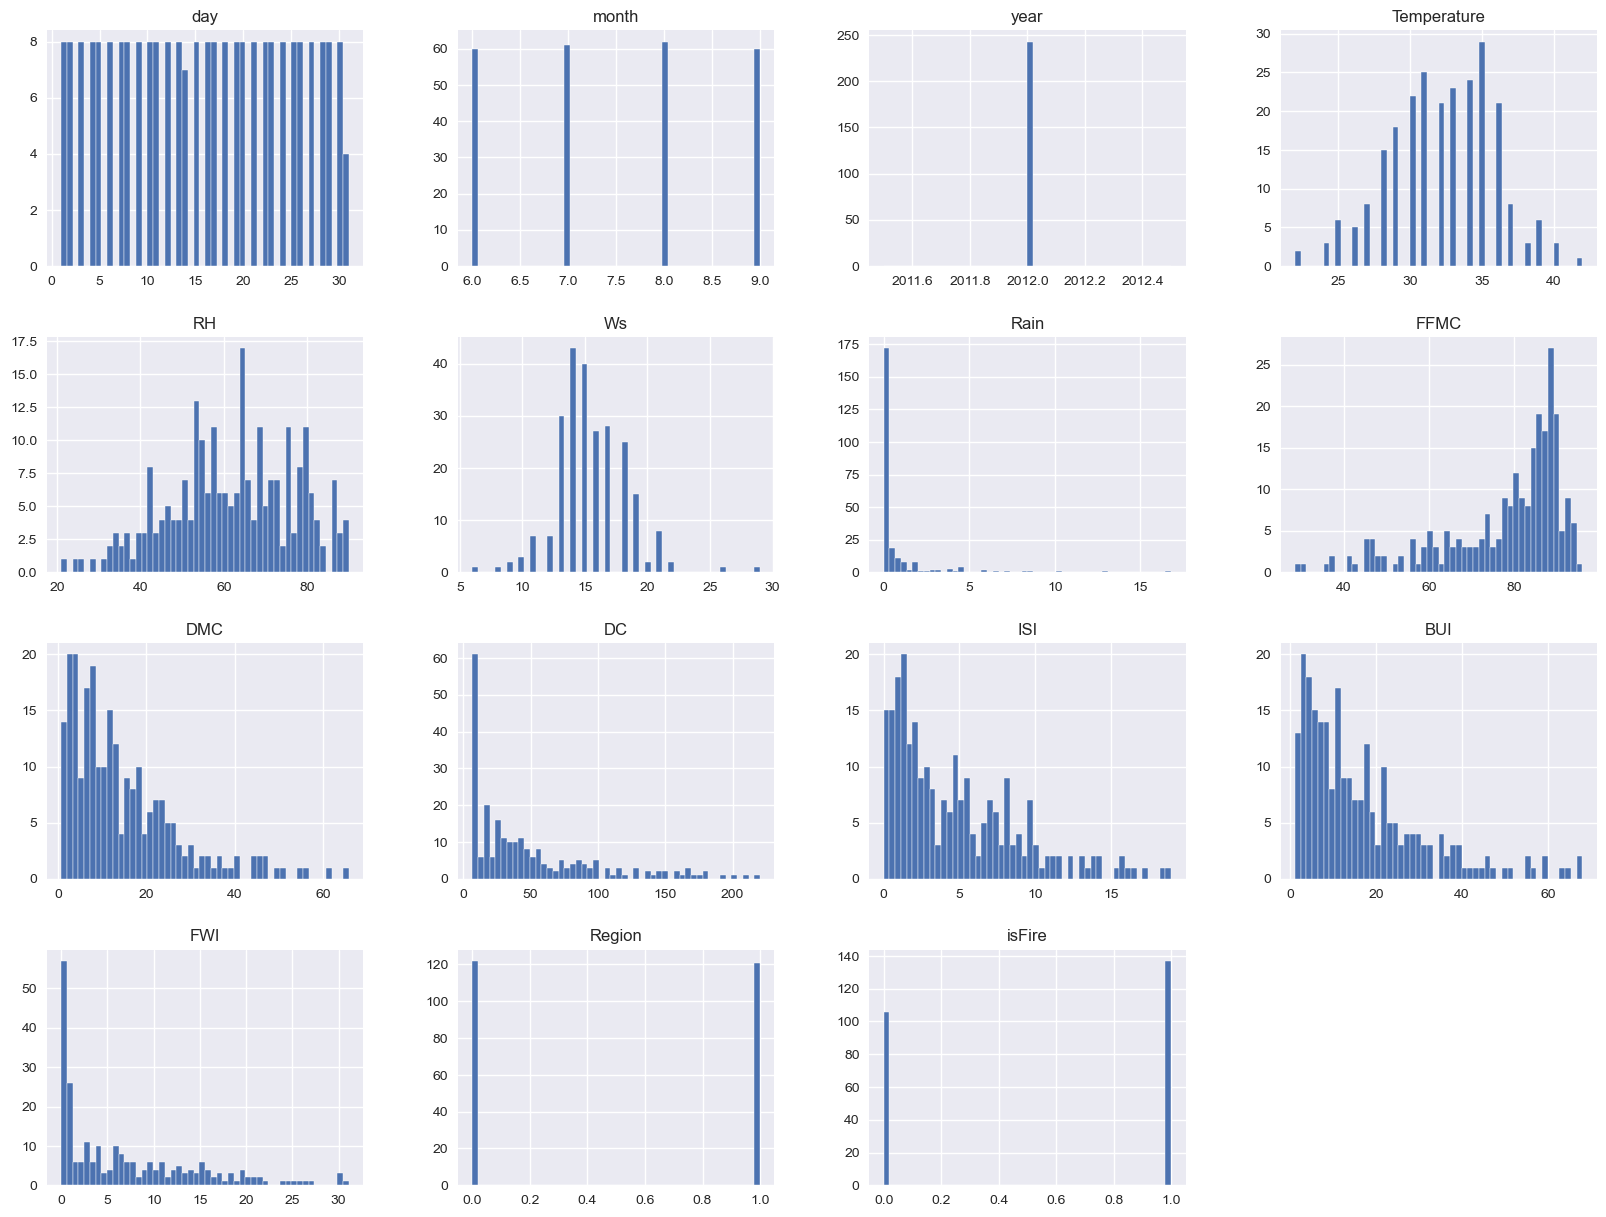

In [46]:
plt.style.use("seaborn-v0_8")
df.hist(bins=50, figsize=(20,15))
plt.show()


In [47]:
df.corr(numeric_only=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,isFire
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821,0.202840
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857,0.024004
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555,0.516015
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682,-0.432161
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160,-0.069964
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013,-0.379097
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241,0.769492
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089,0.585658
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734,0.511123


<Axes: >

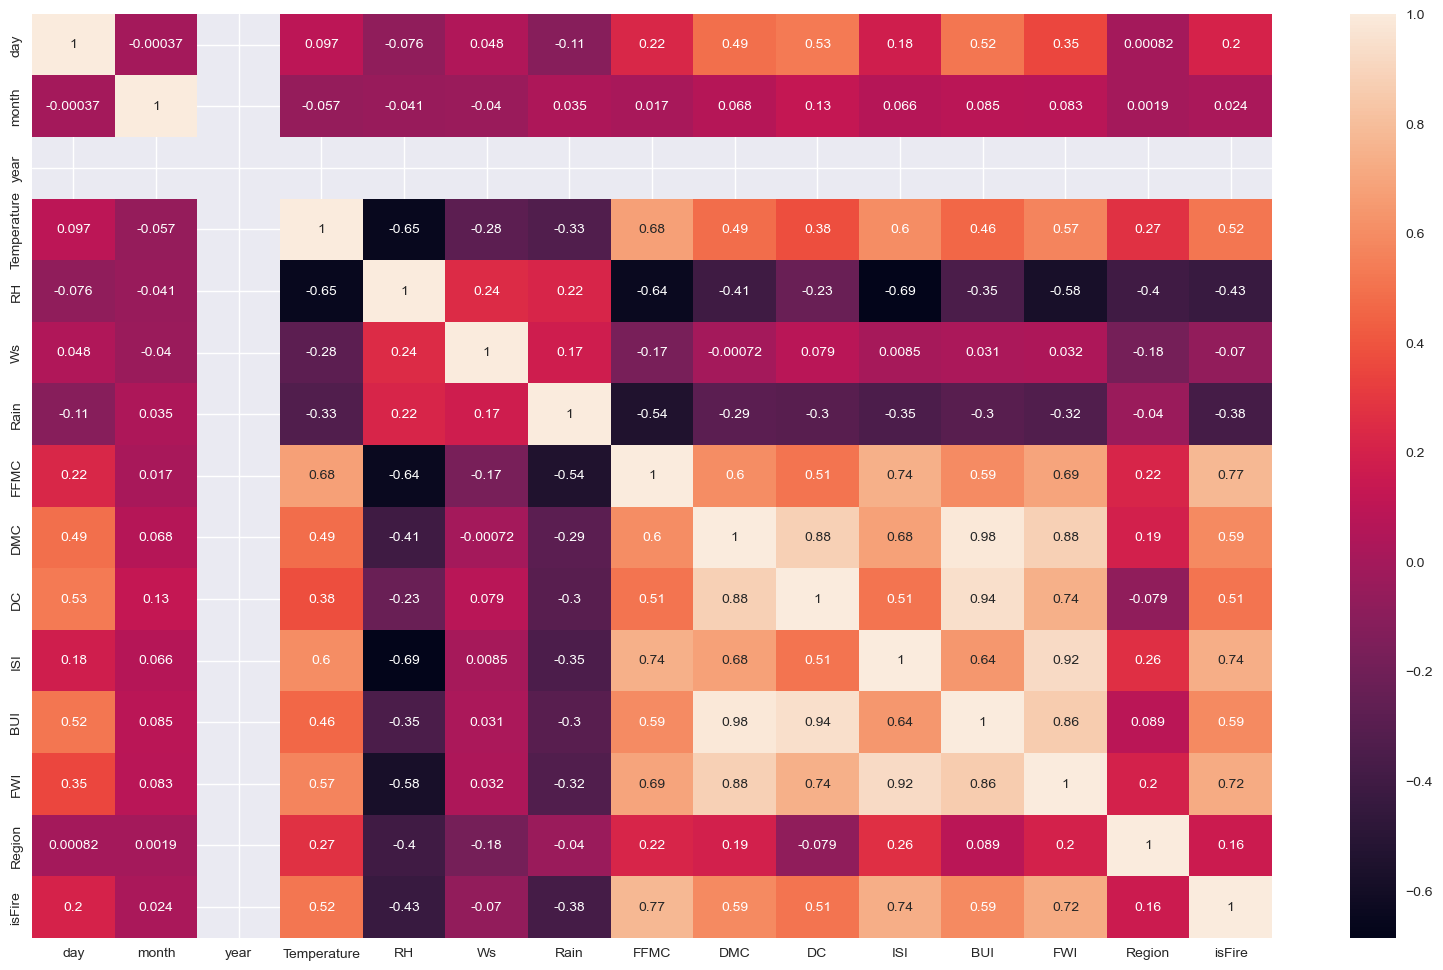

In [48]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True), annot=True)

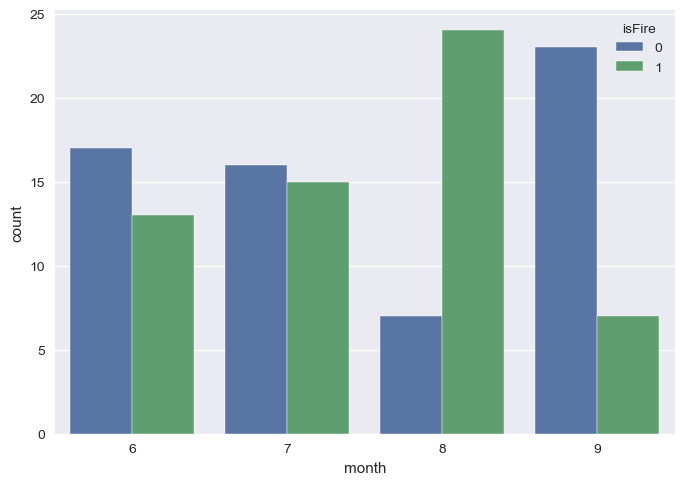

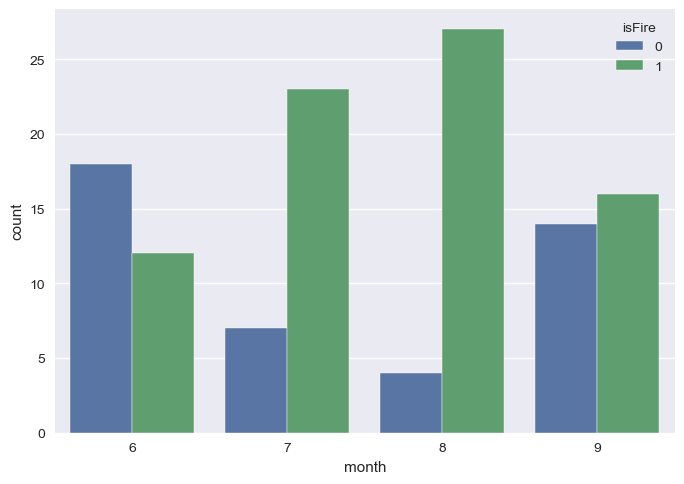

In [49]:
region1 = df[df["Region"] == 0]
region2 = df[df["Region"] == 1]
sns.countplot(data = region1, x = "month", hue = "isFire")
plt.show()
sns.countplot(data = region2, x = "month", hue = "isFire")
plt.show()

In [52]:
sns.pairplot(df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F58842F600> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [53]:
dataset = df

In [54]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'isFire'],
      dtype='object')

In [55]:
dataset.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [56]:
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,isFire
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0


In [57]:
dataset.drop("Classes", axis=1, inplace=True)

In [58]:
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,isFire
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [59]:
dataset.corr(numeric_only=True)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,isFire
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.089408,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.197102,0.719216


In [60]:
X = dataset.drop("FWI", axis=1)
y = dataset["FWI"]

In [61]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,isFire
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [62]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
sns.pairplot(X.corr(numeric_only=True))


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001F585536F20> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x000001F58842F600> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [65]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr(numeric_only=True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [66]:
corr_feeatures = correlation(X, 0.80)

In [67]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
X_test.drop(corr_feeatures, axis=1, inplace=True)
X_train.drop(corr_feeatures, axis=1, inplace=True)
X_test.shape, X_train.shape

((194, 9), (49, 9))

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<Axes: title={'center': 'Boxplot of Features'}>

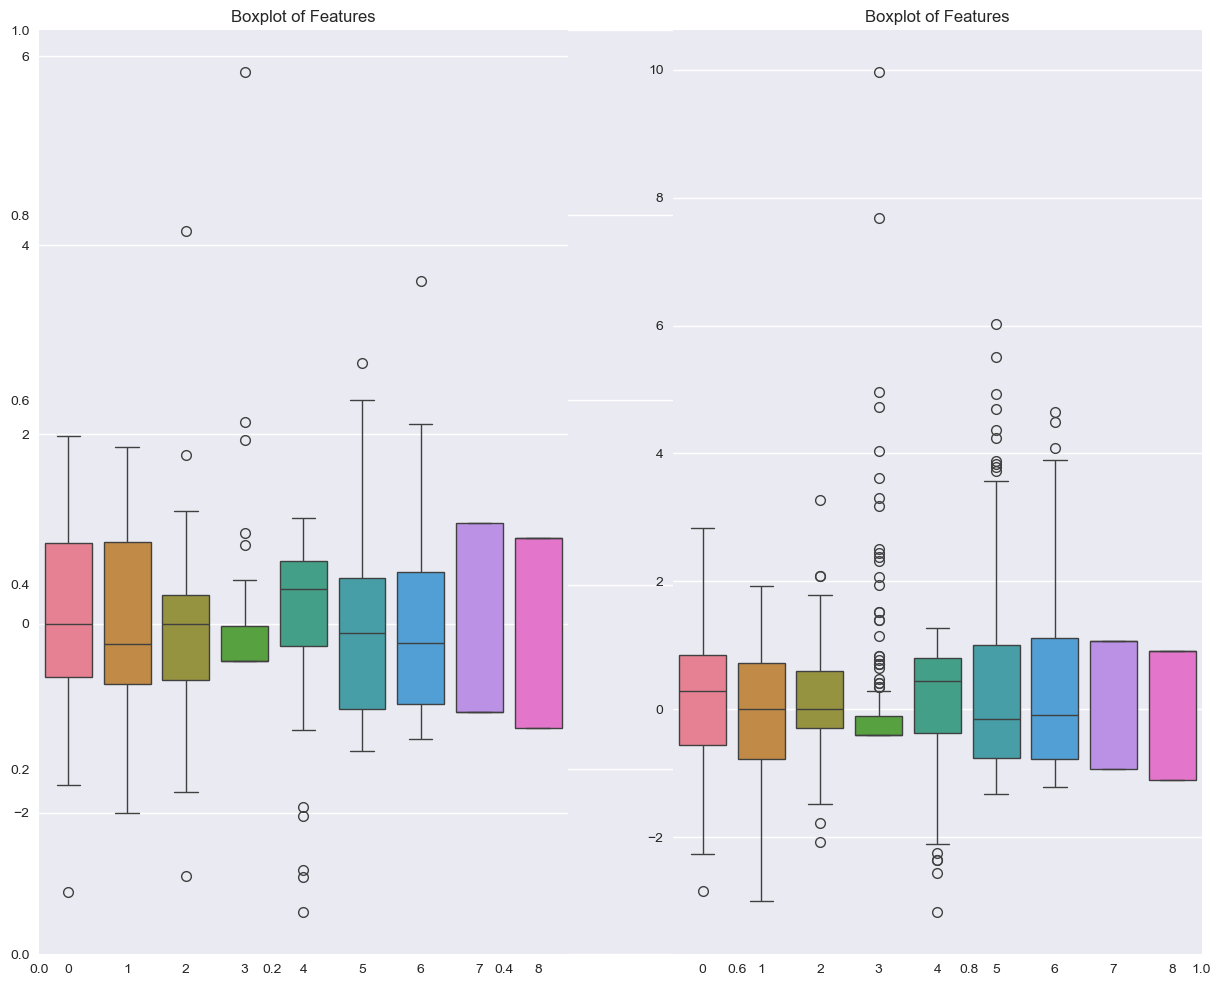

In [72]:
plt.subplots(figsize=(15,12))
plt.subplot(1,2,1)
plt.title("Boxplot of Features")
sns.boxplot(data = X_train)
plt.subplot(1,2,2)
plt.title("Boxplot of Features")
sns.boxplot(data = X_test)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

In [74]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = lin_reg.predict(X_test)

In [76]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
y_std = y_test.std()
y_train_pred = lin_reg.predict(X_train)

In [77]:
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print("Std y", y_std)
print("Adjusted R2:", 1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (len(y_test) - X.shape[1] - 1))
print("Train/Test MSE Ratio:", mean_squared_error(y_train, y_train_pred) / mean_squared_error(y_test, y_pred))


MSE: 1.9394599101532393
MAE: 0.7564070531541051
RMSE: 1.3926449332666382
R2: 0.9680329944674747
Std y 7.809291529083034
Adjusted R2: 0.9661009227045199
Train/Test MSE Ratio: 0.1996957031213568


In [78]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import  RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import numpy as np

def train_ridge(X_train, y_train, X_test, y_test, alpha=1.0):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    return evaluate_model(model, X_train, y_train, X_test, y_test)

def train_lasso(X_train, y_train, X_test, y_test, alpha=1.0):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    return evaluate_model(model, X_train, y_train, X_test, y_test)

def train_elasticnet(X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.5):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train, y_train)
    return evaluate_model(model, X_train, y_train, X_test, y_test)

def train_ridge_cv(X_train, y_train, X_test, y_test, alpha=1.0):
    model = RidgeCV()
    model.fit(X_train, y_train)
    return evaluate_model(model, X_train, y_train, X_test, y_test)

def train_lasso_cv(X_train, y_train, X_test, y_test, alpha=1.0):
    model = LassoCV()
    model.fit(X_train, y_train)
    return evaluate_model(model, X_train, y_train, X_test, y_test)

def train_elasticnet_cv(X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.5):
    model = ElasticNetCV()
    model.fit(X_train, y_train)
    return evaluate_model(model, X_train, y_train, X_test, y_test)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    y_std = y_test.std()
    train_test_mse_ratio = mean_squared_error(y_train, y_train_pred) / mse

    metrics = {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2,
        "Adjusted R2": adj_r2,
        "Std(y_test)": y_std,
        "Train/Test MSE Ratio": train_test_mse_ratio
    }

    return model, metrics

def print_metrics(metrics, title):
    print(f"{'='*25}{title}{'='*25}")
    for key, value in metrics.items():
        print(f"{key}: {value}")

In [79]:
ridge_model, ridge_metrics = train_ridge(X_train, y_train, X_test, y_test, alpha=10)
lasso_model, lasso_metrics = train_lasso(X_train, y_train, X_test, y_test, alpha=0.1)
enet_model, enet_metrics = train_elasticnet(X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.7)

print_metrics(ridge_metrics, "Ridge")
print_metrics(lasso_metrics, "Lasso")
print_metrics(enet_metrics, "ElasticNet")

=========================Ridge=========================
MSE: 3.6424811239021064
MAE: 1.2686580820978912
RMSE: 1.9085285232089424
R2: 0.9399630723840549
Adjusted R2: 0.9370264835332749
Std(y_test): 7.809291529083034
Train/Test MSE Ratio: 0.3328402855689748
=========================Lasso=========================
MSE: 2.0711581222596553
MAE: 0.8011741645654208
RMSE: 1.4391518760226996
R2: 0.9658622883585267
Adjusted R2: 0.9641925089847591
Std(y_test): 7.809291529083034
Train/Test MSE Ratio: 0.2489139143372927
=========================ElasticNet=========================
MSE: 7.857726472860668
MAE: 1.913014194653586
RMSE: 2.8031636543128675
R2: 0.8704856004932009
Adjusted R2: 0.864150657039064
Std(y_test): 7.809291529083034
Train/Test MSE Ratio: 0.4000906402848656


In [80]:
ridge_model_cv, ridge_metrics_cv = train_ridge_cv(X_train, y_train, X_test, y_test, alpha=10)
lasso_model_cv, lasso_metrics_cv = train_lasso_cv(X_train, y_train, X_test, y_test, alpha=0.1)
enet_model_cv, enet_metrics_cv = train_elasticnet_cv(X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.7)

print_metrics(ridge_metrics_cv, "Ridge")
print_metrics(lasso_metrics_cv, "Lasso")
print_metrics(enet_metrics_cv, "ElasticNet")

=========================Ridge=========================
MSE: 1.9526915616364802
MAE: 0.809988045479011
RMSE: 1.3973874057098412
R2: 0.9678149047436527
Adjusted R2: 0.966240633780027
Std(y_test): 7.809291529083034
Train/Test MSE Ratio: 0.2094461521207941
=========================Lasso=========================
MSE: 1.9388617195441562
MAE: 0.7443008911934671
RMSE: 1.3924301488922726
R2: 0.968042854100257
Adjusted R2: 0.9664797328334218
Std(y_test): 7.809291529083034
Train/Test MSE Ratio: 0.21261555236627375
=========================ElasticNet=========================
MSE: 1.9742186495149823
MAE: 0.8091285323786731
RMSE: 1.4050689127281204
R2: 0.967460086098674
Adjusted R2: 0.9658684598752395
Std(y_test): 7.809291529083034
Train/Test MSE Ratio: 0.22261747400095971


In [81]:
import os
import pickle

# Create the directory if it doesn't exist
os.makedirs("../../Resource/Models", exist_ok=True)

# Save models with the new path
with open("../../Resource/Models/ridge_model_cv.pkl", "wb") as f:
    pickle.dump(ridge_model_cv, f)

with open("../../Resource/Models/lasso_model_cv.pkl", "wb") as f:
    pickle.dump(lasso_model_cv, f)

with open("../../Resource/Models/enet_model_cv.pkl", "wb") as f:
    pickle.dump(enet_model_cv, f)

In [82]:
# Load models using proper file handling
with open("../../Resource/Models/ridge_model_cv.pkl", "rb") as f:
    model1 = pickle.load(f)

with open("../../Resource/Models/lasso_model_cv.pkl", "rb") as f:
    model2 = pickle.load(f)

with open("../../Resource/Models/enet_model_cv.pkl", "rb") as f:
    model3 = pickle.load(f)

# Make predictions
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)
predictions3 = model3.predict(X_test)

# Optionally print or return the predictions
print("Ridge predictions:", predictions1[:5])  # Print first 5 predictions as sample
print("Lasso predictions:", predictions2[:5])
print("ElasticNet predictions:", predictions3[:5])

Ridge predictions: [ 1.25802111 27.88648053  5.57521392 17.89743001 18.55615623]
Lasso predictions: [ 1.2431016  28.21368879  5.25608833 18.32596523 18.63355822]
ElasticNet predictions: [ 1.25681453 27.62543855  5.50716429 17.7998811  18.39661078]


In [83]:
with open("../../Resource/Models/scaler_model.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [85]:
X.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Region', 'isFire'],
      dtype='object')

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   Region       243 non-null    int64  
 10  isFire       243 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 21.0 KB


In [89]:
ridge_model.predict([[29, 57, 18,0,65.67,3.4,1.3,1,1]])

array([12.02757879])

In [90]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,isFire
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942,0.563786
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028,0.496938
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000,1.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000
